### <font color='#00d2d3'> Importer les packages

In [51]:
# Importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords') # Télécharger le package stopwords
nltk.download('wordnet')
from nltk.corpus import stopwords # Importer le package stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### <font color='#00d2d3'> Importer et lire les données

In [52]:
# Importer les données
df = pd.read_csv('C:/Users/hp/Documents/nlp/french_tweets.csv')
# Afficher les données
df.head()


,label,text
0,0,"- Awww, c'est un bummer. Tu devrais avoir davi..."
1,0,Est contrarié qu'il ne puisse pas mettre à jou...
2,0,J'ai plongé plusieurs fois pour la balle. A ré...
3,0,Tout mon corps a des démangeaisons et comme si...
4,0,"Non, il ne se comporte pas du tout. je suis en..."


- 1 : Negative
- 0 : Positive

### <font color='#00d2d3'> Pré-traitement des données

In [53]:
# Dimension des données
print(df.shape)


(1526724, 2)


In [54]:
# Sélectionner aléatoirement 50 000 lignes du DataFrame 'df' pour un échantillonnage équilibré
df = df.sample(n=6000, random_state=42)


In [55]:
# Dimension des données
print(df.shape)


(6000, 2)


In [56]:
# verifier les valeurs manquantes
df.isnull().sum()

label    0
text     0
dtype: int64

In [57]:
# Nombre d'observations dans chaque classe
df.label.value_counts()

label
0    3099
1    2901
Name: count, dtype: int64

In [58]:
# Affiche le dataframe finale
df

,label,text
471040,0,El som et la société humaine avec cindy! Je ve...
1340507,1,Quel beau jour d'été
757669,0,Déteste assis à l'intérieur quand c'est une be...
119639,0,Lundi matin même pas le soleil
1190949,1,La soeur a juste été bronzée: soph: 'what are ...
...,...,...
1167672,1,"Examen maintenant! Oui à la maison, attendez q..."
1177206,1,"Écoute le ""drake's"" jusqu'ici allé & quot; Lai..."
1414125,1,Merci d'avoir partagé cela. Très drôle. J'ai s...
417575,0,"À la maison hors de la douche, omg est gelé! É..."


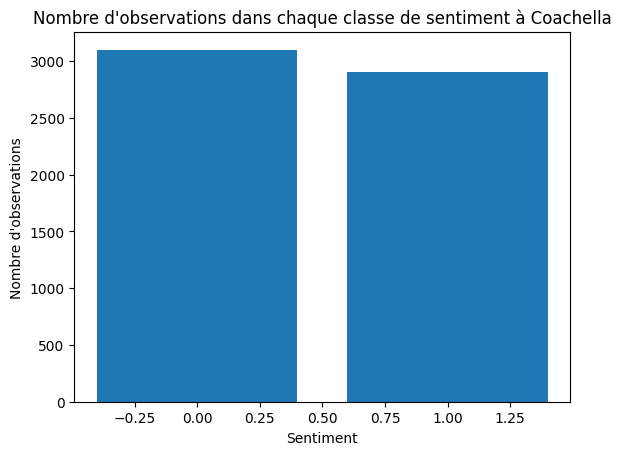

In [59]:
# Calculer le nombre d'observations pour chaque classe de sentiment
sentiment_counts = df['label'].value_counts()

# Créer un diagramme à barres
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Ajouter des étiquettes et afficher le graphique
plt.xlabel('Sentiment')
plt.ylabel('Nombre d\'observations')
plt.title('Nombre d\'observations dans chaque classe de sentiment à Coachella')
plt.show()


#### <font color='#00d2d3'> Pré-traitement des données textuelles

In [60]:
# Afficher une ligne
df['text'][471040]

'El som et la société humaine avec cindy! Je veux vraiment un chiot ou un chaton'

###### <font color='#1dd1a1'> Commencer le nettoyage des tweets


In [61]:
# Fonction supprimant les liens
def remove_links(text):
    text = re.sub(r'http:?//\S+|https:?//\S+', '', text)
    return text


In [62]:
# Fonction supprimant les @username
def remove_users(text):
    text = re.sub(r'@[\w\-\.]+', '', text)  #re.sub(r'@[a-zA-Z0-9-._]+', '', text)
    return text


In [63]:
# Supprimer les adresses emails
def email_address(text):
    text = re.sub(r'[\w\-\.]+@[\w\-\.]+', '', text)
    return text

In [64]:
! pip install contractions

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
import contractions
# Fonction étendant les contractions
def contraction(text):
    expanded_all = []
    for word in text.split():
        expanded_all.append(contractions.fix(word)) # utiliser la fonction fix de contractions

    expand = ' '.join(expanded_all)
    return expand

In [66]:
# Supprimer html caractères
def clean_html(text):
  text = re.sub(r'&\w+','', text)
  return text

In [67]:
# Remplacer tout ce qui n'est chaines de caractères alphabétiques et espace par ' '
def alpha_b(text):
  text = re.sub(r'[^a-zA-Z\s]+','', text)
  return text

In [68]:
# Fonction remplaçant les espaces multiples et convertissant majuscules en minuscules
def lower(text):
    # Remplacer les espaces multiples par un seul espace
    text = re.sub(r'\s+',' ', text)

    # Convertir les majuscules en minuscules
    text = text.lower()
    return text

In [69]:
# Supprimer les espaces en début et fin de tweet
def clean_space(text):
  text = text.strip()
  return text

In [70]:
# Fonction supprimant les stopwords
def remove_stopwords(text):
    Stopwords = stopwords.words('english')
    text= ' '.join([word for word in text.split() if word not in Stopwords])
    return text

In [71]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
def lem_sw(text):
    text = [lemma.lemmatize(word) for word in text.split()]
    text = " ".join(text)
    return text

###### <font color='#1dd1a1'> Appliquer les différentes fonctions sur les tweets



In [72]:
# Appliquer la fonction remove_users
df['new_text'] = df.text.apply(func = remove_users)

# Appliquer la fonction remove_links
df['new_text']= df.new_text.apply(func = email_address)

# Appliquer la fonction email_address
df['new_text'] = df.new_text.apply(func = remove_links)

# Appliquer la fonction remove_contraction
df['new_text'] = df.new_text.apply(func = contraction)

# Appliquer la fonction clean_html
df['new_text'] = df.new_text.apply(func = clean_html)

# Appliquer la fonction alpha_b
df['new_text'] = df.new_text.apply(func = alpha_b)

# Appliquer la fonction lower
df['new_tweet'] = df.new_text.apply(func = lower)

# Appliquer la fonction clean_space
df['new_text'] = df.new_text.apply(func = clean_space)

# Appliquer la fonction remove_stopwords
df['new_text'] = df.new_text.apply(func = remove_stopwords)

# Appliquer la fonction lem_sw
df['new_text'] = df.new_text.apply(func = lem_sw)


In [73]:
# Afficher df
df

,label,text,new_text,new_tweet
471040,0,El som et la société humaine avec cindy! Je ve...,El som et la socit humaine avec cindy Je veux ...,el som et la socit humaine avec cindy je veux ...
1340507,1,Quel beau jour d'été,Quel beau jour dt,quel beau jour dt
757669,0,Déteste assis à l'intérieur quand c'est une be...,Dteste assis lintrieur quand cest une belle jo...,dteste assis lintrieur quand cest une belle jo...
119639,0,Lundi matin même pas le soleil,Lundi matin mme pa le soleil,lundi matin mme pas le soleil
1190949,1,La soeur a juste été bronzée: soph: 'what are ...,La soeur juste bronze soph Jess acajou elle la...,la soeur a juste t bronze soph what are you je...
...,...,...,...,...
1167672,1,"Examen maintenant! Oui à la maison, attendez q...",Examen maintenant Oui la maison attendez que p...,examen maintenant oui la maison attendez que m...
1177206,1,"Écoute le ""drake's"" jusqu'ici allé & quot; Lai...",coute le drake jusquici quot Laisser lui et ll...,coute le drakes jusquici all quot laisser lui ...
1414125,1,Merci d'avoir partagé cela. Très drôle. J'ai s...,Merci davoir partag cela Trs drle Jai suivi,merci davoir partag cela trs drle jai suivi
417575,0,"À la maison hors de la douche, omg est gelé! É...",la maison hors de la douche omg est gel cole d...,la maison hors de la douche omg est gel cole ...


In [74]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Diviser les données en features (X) et labels (y)
x = df. drop('label', axis=1)
# Assurez-vous d'ajuster le nom de la colonne si nécessaire
y = df[ 'label']
# Initialiser l'objet RandomOverSampler
ros = RandomOverSampler (random_state=42)
# Appliquer la suréchantillonnage aux données
X_resampled, y_resampled = ros.fit_resample(x, y)
# Créer un nouveau DataFrame avec les données équilibrées 
df = pd. concat ([X_resampled, y_resampled], axis=1)
# Afficher la distribution des classes dans les données équilibrées 
print (df['label'].value_counts ())

label
0    3099
1    3099
Name: count, dtype: int64


### <font color='#00d2d3'> Vectorisation

In [75]:
# Importer les packages
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [76]:
# Nombre de mots
import json
voc_size = len(set(" ".join(df.new_text).split()))
# Initialiser le modèle Tokenizer
tokenizer = Tokenizer(num_words=voc_size, split=' ')
# Entrainer les données
tokenizer.fit_on_texts(df['new_text'].values)
# Vectoriser
X = tokenizer.texts_to_sequences(df['new_text'].values)
# Padding
X = pad_sequences(X)
tokenizer_json = tokenizer.to_json()
with open ('tokenizerfr.json', 'w', encoding='utf-8') as json_file:
    json.dump(tokenizer_json, json_file, ensure_ascii=False)

In [77]:
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 2730, 4362,    7,    4, 1233, 4363,   23, 4364,    2,   65,
          41,    8,  978,   79,    8, 2054],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  232,  261,   50,  405],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  120,  406,
         979,   82,   22,   17,  294,   67],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  

### <font color='#00d2d3'> Sentiment Analysis 

In [78]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout

In [79]:
# Dimension des vecteurs
emb_dim=100
model=Sequential()
model.add(Embedding(voc_size, emb_dim, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(200, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(200)))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
# Compiler le modèle
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Afficher le summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 39, 100)           1167100   
                                                                 
 bidirectional_2 (Bidirecti  (None, 39, 400)           481600    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 39, 400)           0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 400)               961600    
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

Separation des donnees 

In [80]:
# Importer train_test_split
from sklearn.model_selection import train_test_split
# Labels
y = df.label.values
# Splitter en train, validation et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [81]:
# Afficher les dimensions des ensembles
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (4958, 39) (4958,)
Validation set: (620, 39) (620,)
Test set: (620, 39) (620,)


Keras Turner pour trouver les hyperparametre du model

In [82]:
import tensorflow as tf
from tensorflow import keras

In [83]:
! pip install -q -U keras-tuner

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense, Embedding, Bidirectional, Dropout
from tensorflow.keras.layers import GRU

In [85]:
def model_builder(hp):
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    
    # Choose an optimal value between 100-256
    emb_dim = hp.Int('emb_dim', min_value=100, max_value=256, step=32)
    
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    # Choose an RNN type
    model_type = hp.Choice('rnn_type', values=['gru', 'lstm', 'bidirectional_gru', 'bidirectional_lstm'])
    
    model = Sequential()
    
    if model_type == 'gru':
        model.add(Embedding(voc_size, emb_dim, input_length=X.shape[1]))
        model.add(GRU(units=hp_units, return_sequences=True))
        model.add(Dropout(0.4))
        model.add(GRU(units=hp_units))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
    elif model_type == 'lstm':
        model.add(Embedding(voc_size, emb_dim, input_length=X.shape[1]))
        model.add(LSTM(units=hp_units, return_sequences=True))
        model.add(Dropout(0.4))
        model.add(LSTM(units=hp_units))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
    elif model_type == 'bidirectional_gru':
        model.add(Embedding(voc_size, emb_dim, input_length=X.shape[1]))
        model.add(Bidirectional(GRU(units=hp_units, return_sequences=True)))
        model.add(Dropout(0.4))
        model.add(Bidirectional(GRU(units=hp_units)))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
    elif model_type == 'bidirectional_lstm':
        model.add(Embedding(voc_size, emb_dim, input_length=X.shape[1]))
        model.add(Bidirectional(LSTM(units=hp_units, return_sequences=True)))
        model.add(Dropout(0.4))
        model.add(Bidirectional(LSTM(units=hp_units)))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [86]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    overwrite=True,  # Nombre total d'essais de modèles
    directory='my_dir',  # Répertoire pour enregistrer les résultats du tuner
    project_name='intro_to_kt'
)


In [87]:
from tensorflow.keras.callbacks import EarlyStopping

# Ajout d'un callback d'arrêt précoce
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Recherche des hyperparamètres
tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=64)

# Lancer la recherche d'hyperparamètres
tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Récupérer les meilleurs hyperparamètres
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model_type = best_hps.get('rnn_type')

# Afficher les meilleurs hyperparamètres
print(f"""
Le type de modèle optimal est {best_model_type}.
Le nombre optimal d'unités dans la première couche dense est {best_hps.get('units')} 
et le taux d'apprentissage optimal pour l'optimiseur est {best_hps.get('learning_rate')}. 
et la dimension d'embedding optimale est {best_hps.get('emb_dim')}
""")


Trial 5 Complete [00h 03m 14s]
val_accuracy: 0.7516129016876221

Best val_accuracy So Far: 0.7516129016876221
Total elapsed time: 00h 34m 19s

Le type de modèle optimal est bidirectional_lstm.
Le nombre optimal d'unités dans la première couche dense est 128 
et le taux d'apprentissage optimal pour l'optimiseur est 0.001. 
et la dimension d'embedding optimale est 132



In [88]:
tuner.results_summary()

Results summary
Results in my_dir\intro_to_kt
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
units: 128
emb_dim: 132
learning_rate: 0.001
rnn_type: bidirectional_lstm
Score: 0.7516129016876221

Trial 0 summary
Hyperparameters:
units: 384
emb_dim: 100
learning_rate: 0.001
rnn_type: bidirectional_lstm
Score: 0.7241935729980469

Trial 2 summary
Hyperparameters:
units: 320
emb_dim: 164
learning_rate: 0.001
rnn_type: bidirectional_gru
Score: 0.7145161032676697

Trial 3 summary
Hyperparameters:
units: 480
emb_dim: 164
learning_rate: 0.001
rnn_type: bidirectional_gru
Score: 0.7112902998924255

Trial 1 summary
Hyperparameters:
units: 160
emb_dim: 228
learning_rate: 0.01
rnn_type: bidirectional_lstm
Score: 0.7064515948295593


In [96]:
# Construire le modèle avec les hyperparamètres optimaux
model = tuner.hypermodel.build(best_hps)

# Entraîner le modèle sur les données pendant 50 époques
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Récupérer la précision de validation par époque
val_acc_per_epoch = history.history['val_accuracy']

# Trouver la meilleure époque basée sur la précision de validation
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch))
print('Meilleure époque : %d' % (best_epoch,))


Epoch 1/5
155/155 [==============================] - 32s 173ms/step - loss: 0.6291 - accuracy: 0.6335 - val_loss: 0.5535 - val_accuracy: 0.7242
Epoch 2/5
155/155 [==============================] - 31s 201ms/step - loss: 0.3815 - accuracy: 0.8354 - val_loss: 0.5706 - val_accuracy: 0.7177
Epoch 3/5
155/155 [==============================] - 32s 206ms/step - loss: 0.1836 - accuracy: 0.9342 - val_loss: 0.8432 - val_accuracy: 0.7081
Epoch 4/5
155/155 [==============================] - 32s 203ms/step - loss: 0.1024 - accuracy: 0.9633 - val_loss: 1.0179 - val_accuracy: 0.6984
Epoch 5/5
155/155 [==============================] - 32s 205ms/step - loss: 0.0562 - accuracy: 0.9845 - val_loss: 1.1568 - val_accuracy: 0.6887
Meilleure époque : 0


In [97]:
# Construire à nouveau le modèle avec les meilleurs hyperparamètres
hypermodel = tuner.hypermodel.build(best_hps)

# Réentraîner le modèle sur toutes les données jusqu'à la meilleure époque identifiée (4 dans cet exemple)
hypermodel.fit(X_train, y_train, epochs=5)


Epoch 1/5
155/155 [==============================] - 33s 175ms/step - loss: 0.6294 - accuracy: 0.6440
Epoch 2/5
155/155 [==============================] - 30s 193ms/step - loss: 0.3840 - accuracy: 0.8403
Epoch 3/5
155/155 [==============================] - 30s 193ms/step - loss: 0.1885 - accuracy: 0.9361
Epoch 4/5
155/155 [==============================] - 29s 187ms/step - loss: 0.0902 - accuracy: 0.9712
Epoch 5/5
155/155 [==============================] - 31s 198ms/step - loss: 0.0571 - accuracy: 0.9820


In [98]:
# Évaluer les performances du modèle sur l'ensemble de validation
eval_result = hypermodel.evaluate(X_val, y_val)

# Afficher les résultats
print(f"Loss sur l'ensemble de validation : {eval_result[0]}")
print(f"Précision sur l'ensemble de validation : {eval_result[1]}")


20/20 [==============================] - 2s 53ms/step - loss: 1.1624 - accuracy: 0.7000
Loss sur l'ensemble de validation : 1.1624436378479004
Précision sur l'ensemble de validation : 0.699999988079071


In [104]:
# Enregistrer le modèle  
hypermodel.save('Sentiment_Analysis_fr.h5')


###### <font color='#1dd1a1'> Test le modèle

In [100]:
# x_text text non vectorisées
tweet = tokenizer.sequences_to_texts(X_test[1:6])
# x_text text vectorisées
twt = X_test[1:6]
print(tweet)

['lol merci je ne suis quune fille moyenne le maquillage lclairage et le vtements mignons font vraiment leffet glamour', 'haha vous te fou julene je taime mais tu e fou', 'regarde lautre fille de boleyn cest une soire froide et pluvieuse et jaime', 'lobtention du diplme de demain x ahhh je ne sais pa comment je devrais en ressentir', 'ahhhhhhhhhhh il ne laissera pa regarder le reste']


In [101]:
# Prédictions les labels
y_pred=model.predict(twt)
# Arrondir les valeus
y_pred = np.round(y_pred)

1/1 [==============================] - 1s 1s/step


In [103]:
# Afficher les sentiments prédits
for i in range(0, 5):
    print(tweet[i], "---------", ["Negative sentiment" if int(y_pred[i]) == 0 else "Positive sentiment"])

lol merci je ne suis quune fille moyenne le maquillage lclairage et le vtements mignons font vraiment leffet glamour --------- ['Positive sentiment']
haha vous te fou julene je taime mais tu e fou --------- ['Positive sentiment']
regarde lautre fille de boleyn cest une soire froide et pluvieuse et jaime --------- ['Positive sentiment']
lobtention du diplme de demain x ahhh je ne sais pa comment je devrais en ressentir --------- ['Negative sentiment']
ahhhhhhhhhhh il ne laissera pa regarder le reste --------- ['Negative sentiment']


C:\Users\HP\AppData\Local\Temp\ipykernel_19316\3629067660.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(tweet[i], "---------", ["Negative sentiment" if int(y_pred[i]) == 0 else "Positive sentiment"])
